<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.A - Grafos </h2>
</center>
</p>
</div>

## Atributos

Un grafo está formado por dos elementos principales, vértices (Nodes) y aristas (Edges). 

Los elementos atómicos de un grafo son los vértices, representados gráficamente con puntos. En el siguiente ejemplo podemos observar cómo creamos un grafo con tres nodos con la función: `add_nodes_from`

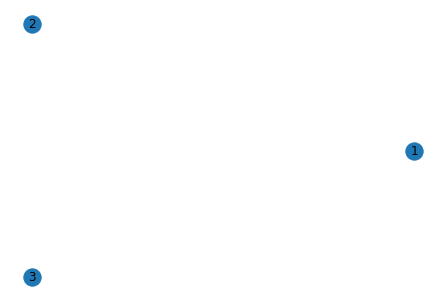

In [2]:
%matplotlib inline
import networkx as nx
G = nx.Graph()
G.add_nodes_from((1,2,3))
nx.draw_circular(G, with_labels=True)

El otro atributo principal de un __grafo__ son las aristas (edges), estas son las conexiones entre todos nuestros nodos. En el siguiente ejemplo de código podemos ver como añadimos los vértices que van de 1 a 2 y de 1 a 3 sobre el grafo con 3 nodos del ejemplo anterior.  

In [1]:
G.add_edges_from(((1,2), (1,3)))
nx.draw_circular(G, with_labels=True)

NameError: name 'G' is not defined

## Tipos de grafos

Hay diferentes tipos de grafos en función de sus características, en esta introducción destacaremos tres tipos:

- Grafos dirigidos
- Grafos inconexos
- Grafos regulares

C:\Users\oriol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


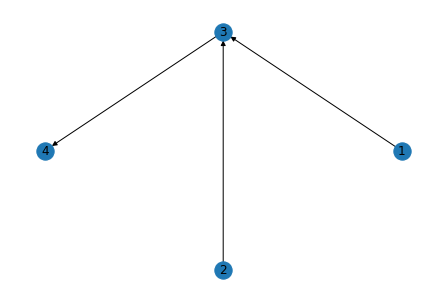

In [3]:
# Grafo dirigido:
# - Las aristas tienen dirección
DG = nx.DiGraph()
DG.add_edges_from(((1,3), (3,4), (2,3)))
nx.draw_circular(DG, with_labels=True)

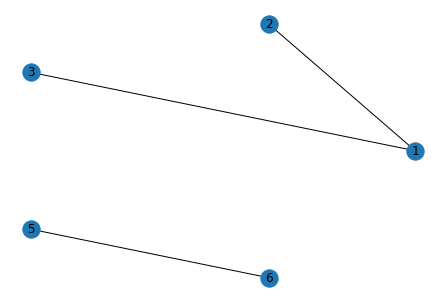

In [4]:
# Grafo inconexo no dirigido
# - Partiendo de un nodo cualquiera no se puede llegar a recorrer todo el grafo
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,3), (5,6)))
nx.draw_circular(UG, with_labels=True)

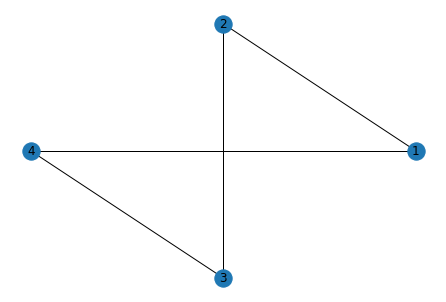

In [5]:
# Grafo regular no dirigido
# - Todos los nodos tienen el mismo grado
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3)))
nx.draw_circular(UG, with_labels=True)

## Propiedades

- __Orden__ de un grafo: El orden de un grafo es el número de vértices que contiene.
- __Grado__ de un vértice: Número de aristas que conectan con un vértice (en el caso de grafos dirigidos hablaríamos de grado de entrada y de salida).

<div class="alert alert-danger">
<h1>Ejercicio</h1>
<p><strong>
Con la información de la que disponemos, tenéis que crear un gráfo de orden 5 en el que el grado de todos y cada uno de los vértices sea 4.
</strong></p>
</div>

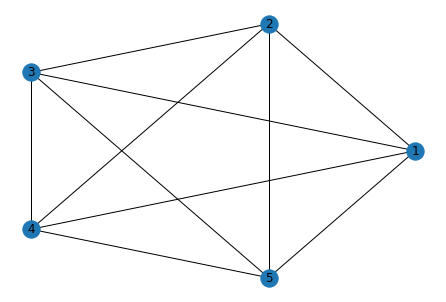

In [15]:
# Ejercicio 1
%matplotlib inline
import networkx as nx
UG = nx.Graph()
UG.add_edges_from(((1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)))
nx.draw_circular(UG, with_labels=True)

En el ejercicio anterior hemos dibujado lo que se llama un __grafo completo__. Este tipo de grafos se caracterizan porque todos los vértices están enlazados entre ellos.

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
En un gráfo completo de orden 4, ¿cuántas aristas existen? ¿Y en un grafo completo de orden $n$?
</strong></p>
</div>


8 aristas = 4x2
En un grafo completo de orden $n$ sera de 2x$n$

# Algoritmos sobre grafos
## Minimum Path


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0- Random Walk</p></h2>
  
  <p>
  La implementación de un algoritmo de random walk es, en este caso, un poco ingenua, ya que la utilizaremos para encontrar un camino entre dos puntos (no hace falta que sea el más corto). 
  </p>
  <p>
  Para el desarrollo de este algoritmo lo único que necesitamos es un nodo inicial y un nodo final. En cada iteración del algoritmo iremos visitando un nodo aleatorio de entre todos los posibles vecinos. El parámetro `repeat` determinará si un nodo que ya ha sido visitado puede volver a ser visitado de nuevo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__repeat__: Booleano indicando si nodos se pueden visitar mas de una vez o no.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [41]:
import random
def random_walk(G, origen, destino, repeat=False):
    path = [origen]
    expanded = 0
    while(origen != destino):
        randnode = random.randint(0, len(G.nodes())) #Generates the next random node
        #Repeat node disabled.
        if not repeat:           
            #No other node found.
            if all(nodes in path for nodes in G.neighbors(origen)):
                print('El camino no ha sido encontrado')
                return {'path' : path, 'expanded' : expanded}
            #Checks if the given random node has been visited and if it has a connection to the current node.
            elif randnode not in path and randnode in G[origen]:
                path.append(randnode)
                origen = randnode
                expanded += 1
            
        #Repeat nodes enabled.
        else:
            path.append(randnode)
            origen = randnode
            expanded += 1
            
    return {
        'path' : path,
        'expanded' : expanded
    }

In [42]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(100, 2) # Genera un grafo aleatorio
random_walk(G, 1, 95)

The path f*cked up.


{'path': [1, 41, 9, 0, 49, 4, 40, 42, 32, 58, 13, 74, 60, 24, 94, 5, 11],
 'expanded': 16}

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Es posible encontrar siempre un camino?
</strong></p>
</div>

Si no se puede repetir el vistar nodos no debido a que puede ser que solo haya una arista en el camino y se deba acceder para encontrar el nodo destino. Tambien puede ser que el grafo sea inconexo i el destino este en la parte no conexa. Por último podria ser que el random de un infinito al ser el grafo grande i poder repetir ya que puede ser que nunca toque el destino y en el orden de los vertices al final tocaria posiblemente por estadistica pero muy dificil y no seria nada eficiente


<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Modifica el algoritmo para ir dejando "<i>migas de pan</i>" en los nodos visitados, es decir, incrementa en uno un contador de veces visitado cada vez que se visita el nodo.
</strong></p>
</div>

In [40]:
import random
def random_walk(G, origen, destino, repeat=True):
    path = [origen]
    expanded = 0
    trail = {origen : 1}
    
    while(origen != destino):
        randnode = random.randint(0, len(G.nodes())) #Generates the next random node
        
        #Repeat node disabled.
        if not repeat:           
            #No other node found.
            if all(nodes in path for nodes in G[origen]):
                print ("The path f*cked up.")
                return {'path' : path, 'expanded' : expanded}
            #Checks if the given random node has been visited and if it has a connection to the current node.
            elif randnode not in path and randnode in G[origen]:
                path.append(randnode)
                origen = randnode
                expanded += 1
            
        #Repeat nodes enabled.
        else:
            path.append(randnode)
            origen = randnode
            expanded += 1
            if randnode in trail:
                trail[randnode] += 1
            else:
                trail.update({randnode : 1})
            
    return {
        'path' : path,
        'expanded' : expanded,
        'trail' : trail
    }


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo <i>Breadth First Search</i> visto en clase. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una cola realizemos una exploración expansiva. Es importante controlar que se trata de un grafo genérico, y no de un arbol, por lo que un mismo nodo nos lo podemos encontrar en varios niveles. En otras palabras, el grafo podría tener ciclos, controlad que cada nodo se visite una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [1]:
from queue import Queue

def bfs(G, origen, destino): 
    path = []
    expanded = 0
    explorado = []
    antecedente = []
    antecedente.append(-1) #Valor del origen
    q = Queue()
    q.put(origen)
    
    while q:
        nodo = q.get() # Obtener la ultima posicion
        expanded+=1
        if(nodo == destino):
            path.append(nodo)
            nodo = antecedente[explorado.index(nodo)]
            while(origen not in path):
                path.append(nodo)
                nodo = antecedente[explorado.index(nodo)]
                
            path.reverse()
            return {
                'path' : path,
                'expanded' : expanded
            }
            
        if(nodo not in explorado):
            explorado.append(nodo)
            
        for neighbour in G.neighbors(nodo):
            if neighbour not in explorado :
                #print(neighbour)
                q.put(neighbour)
                explorado.append(neighbour)
                antecedente.append(nodo)


In [ ]:
%matplotlib inline
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(5, 2)
nx.draw_circular(G, with_labels=True)
bfs(G, 0, 27)